# <p style="text-align: center;"> <b> Đồ án Quan hóa Dữ liệu </b> </p>


---

# Mục lục

---

# Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Đọc dữ liệu

In [2]:
df = pd.read_csv("data/hotel_bookings.csv")

# I. Data Understanding

## 1. Đếm số dòng và số cột

In [3]:
nrows, ncols = df.shape

print(f"Số dòng của tập dữ liệu: {nrows}")
print(f"Số cột của tập dữ liệu: {ncols}")

Số dòng của tập dữ liệu: 119390
Số cột của tập dữ liệu: 32


## 2. Viết bảng mô tả về các cột

Mỗi dòng trong bộ dữ liệu gồm thông tin về một lượt đặt phòng khách sạn. Các cột trong bảng dữ liệu được mô tả như sau:

| **Tên cột** | **Ý nghĩa** |
| --- | --- |
| **`hotel`** | Tên khách sạn (Resort Hotel hoặc City Hotel) |
| **`is_canceled`** | 1 nếu lượt đặt bị hủy, 0 nếu không |
| **`lead_time`** | Số ngày giữa ngày đặt phòng và ngày nhận phòng |
| **`arrival_date_year`** | Năm của ngày nhận phòng |
| **`arrival_date_month`** | Tháng của ngày nhận phòng |
| **`arrival_date_week_number`** | Số tuần trong năm của ngày nhận phòng |
| **`arrival_date_day_of_month`** | Ngày nhận phòng |
| **`stays_in_weekend_nights`** | Số đêm cuối tuần (Thứ 7 và Chủ Nhật) mà khách ở hoặc đặt phòng để ở |
| **`stays_in_week_nights`** | Số đêm trong tuần (từ Thứ 2 đến Thứ 6) mà khách ở hoặc đặt phòng để ở |
| **`adults`** | Số người lớn |
| **`children`** | Số trẻ em |
| **`babies`** | Số em bé |
| **`meal`** | Loại bữa ăn được đặt (Undefined/SC – không bao gồm bữa ăn, BB – Bữa sáng, HB – Bữa sáng và bữa tối, FB – Bữa sáng, bữa trưa và bữa tối) |
| **`country`** | Mã quốc gia của khách (dựa trên ISO 3155-3:2013) |
| **`market_segment`** | Phân khúc thị trường của khách hàng thuộc về (TA: Travel Agents, TO: Tour Operators) |
| **`distribution_channel`** | Kênh phân phối mà qua đó lượt đặt được thực hiện (TA: Travel Agents, TO: Tour Operators) |
| **`is_repeated_guest`** | 1 nếu khách đã từng đặt phòng trước đó, 0 nếu không |
| **`previous_cancellations`** | Số lần hủy đặt phòng trước đó của khách |
| **`previous_bookings_not_canceled`** | Số lần đặt phòng trước đó mà không bị hủy của khách |
| **`reserved_room_type`** | Mã loại phòng đã đặt |
| **`assigned_room_type`** | Mã loại phòng được gán cho lượt đặt |
| **`booking_changes`** | Số lần thay đổi thông tin đặt phòng trước khi nhận phòng hoặc trước khi hủy |
| **`deposit_type`** | Loại tiền đặt cọc đã đặt (No Deposit – không đặt cọc, Non Refund – đặt cọc không hoàn lại toàn bộ, Refundable – đặt cọc hoàn lại toàn bộ) |
| **`agent`** | ID của đại lý đặt phòng |
| **`company`** | ID của công ty (thực thể) đặt phòng hoặc trả tiền cho lượt đặt |
| **`days_in_waiting_list`** | Số ngày mà lượt đặt đã nằm trong danh sách chờ trước khi được xác nhận |
| **`customer_type`** | Loại đặt phòng (Contract, Group, Transient, Transient-Party) |
| **`adr`** | Tỉ lệ giá phòng mỗi đêm |
| **`required_car_parking_spaces`** | Số lượng chỗ đậu xe mà khách yêu cầu |
| **`total_of_special_requests`** | Số lượng yêu cầu đặc biệt từ khách |
| **`reservation_status`** | Trạng thái cuối cùng của lượt đặt (Canceled, Check-Out, No-Show) |
| **`reservation_status_date`** | Ngày cuối cùng mà trạng thái cuối cùng được cập nhật |

## 3. Lấy 5 điểm dữ liệu ra làm mẫu

In [4]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
10386,Resort Hotel,1,21,2017,March,9,2,0,3,2,...,No Deposit,240.0,NaN,0,Transient,112.00,0,1,Canceled,2/13/2017
22912,Resort Hotel,0,31,2016,April,15,7,0,3,3,...,No Deposit,67.0,NaN,0,Transient-Party,92.00,0,0,Check-Out,4/10/2016
83367,City Hotel,0,59,2016,January,5,28,0,2,1,...,No Deposit,87.0,NaN,0,Transient-Party,81.00,0,0,Check-Out,1/30/2016
31227,Resort Hotel,0,42,2016,December,51,17,1,1,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0,1,Check-Out,12/19/2016
26036,Resort Hotel,0,238,2016,July,29,12,2,5,2,...,No Deposit,314.0,NaN,0,Transient,74.06,0,1,Check-Out,7/19/2016


## 4. Phân tích tỷ lệ missing rate

### Tỷ lệ missing rate của các cột trong bộ dữ liệu

In [5]:
missing_rates = df.isna().sum() / len(df) * 100
missing_rates_df = pd.DataFrame({'Tên cột': missing_rates.index, 'Tỉ lệ thiếu dữ liệu (%)': missing_rates.values})
missing_rates_df = missing_rates_df.sort_values(by="Tỉ lệ thiếu dữ liệu (%)", ascending=False)
missing_rates_df.style.background_gradient(cmap='Reds', subset=['Tỉ lệ thiếu dữ liệu (%)'])
# missing_rates_df.style.bar(subset=['Tỉ lệ thiếu dữ liệu (%)'], color='#d65f5f')

,Tên cột,Tỉ lệ thiếu dữ liệu (%)
24,company,94.306893
23,agent,13.686238
13,country,0.408744
10,children,0.003350
19,reserved_room_type,0.000000
20,assigned_room_type,0.000000
21,booking_changes,0.000000
22,deposit_type,0.000000
0,hotel,0.000000
17,previous_cancellations,0.000000


### Tỷ lệ missing rate của các dòng trong bộ dữ liệu

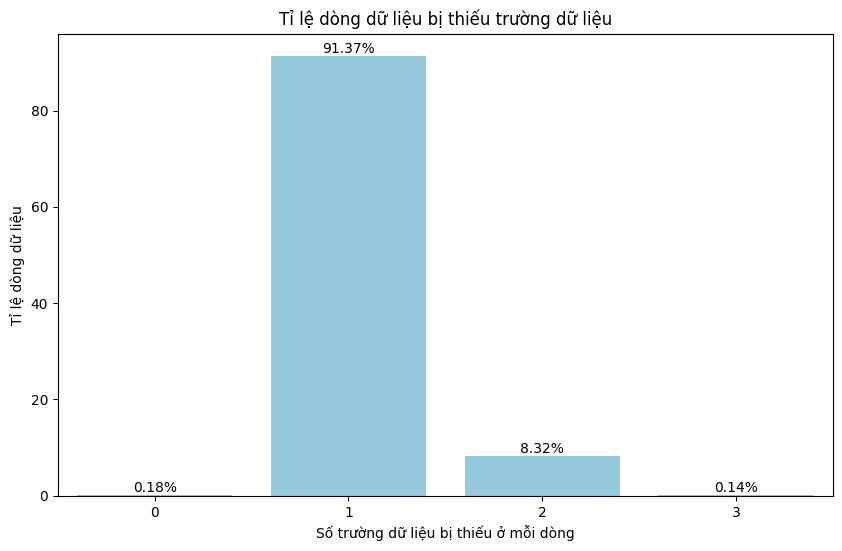

In [6]:
missing_rates_rows = df.isna().sum(axis=1)
missing_rates_rows = missing_rates_rows.value_counts().sort_index() / len(df) * 100
# ghi số lên biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_rates_rows.index, y=missing_rates_rows.values, color='skyblue')
plt.xlabel('Số trường dữ liệu bị thiếu ở mỗi dòng')
plt.ylabel('Tỉ lệ dòng dữ liệu')
plt.title('Tỉ lệ dòng dữ liệu bị thiếu trường dữ liệu')
for i in range(len(missing_rates_rows)):
    plt.text(i, missing_rates_rows.values[i], f'{missing_rates_rows.values[i]:.2f}%', ha='center', va='bottom')
plt.show()

## 5. Phân tích tỷ lệ duplicate

In [7]:
duplicate_rate = df.duplicated().sum() / len(df)
print(f"Tỷ lệ dòng dữ liệu bị trùng lặp là: {round(duplicate_rate, 4) * 100}%")

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()
print(f"Số dòng dữ liệu sau khi loại bỏ trùng lặp: {len(df)}")

Tỷ lệ dòng dữ liệu bị trùng lặp là: 26.8%
Số dòng dữ liệu sau khi loại bỏ trùng lặp: 87396


## 6. Fill missing rate

In [8]:
df = df.fillna(-1)

# II. EDA 1D 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

### 1. Chia loại dữ liệu numerical hoặc categorical

Vì hai biến `is_canceled` và `is_repeated_guest` chỉ có giá trị 0 hoặc 1 nên ta coi chúng là biến categorical.

In [10]:
#convert to category
df['is_canceled'] = df['is_canceled'].astype('object')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('object')

In [11]:
## 1. Chia loại dữ liệu numeric hoặc categorical
cate_list = list(df.dtypes[df.dtypes == 'object'].index)
num_list = list(df.dtypes[df.dtypes != 'object'].index)

### Dữ liệu Numerical 

#### Thống kê mô tả các cột numerical

In [12]:
df[num_list].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138588,0.010824,0.030413,0.183990,0.271603,80.865143,10.076983,0.749565,106.337246,0.084226,0.698567
std,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455936,0.113597,0.369145,1.731894,0.727245,110.048927,54.239239,10.015731,55.013953,0.281533,0.831946
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,-1.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


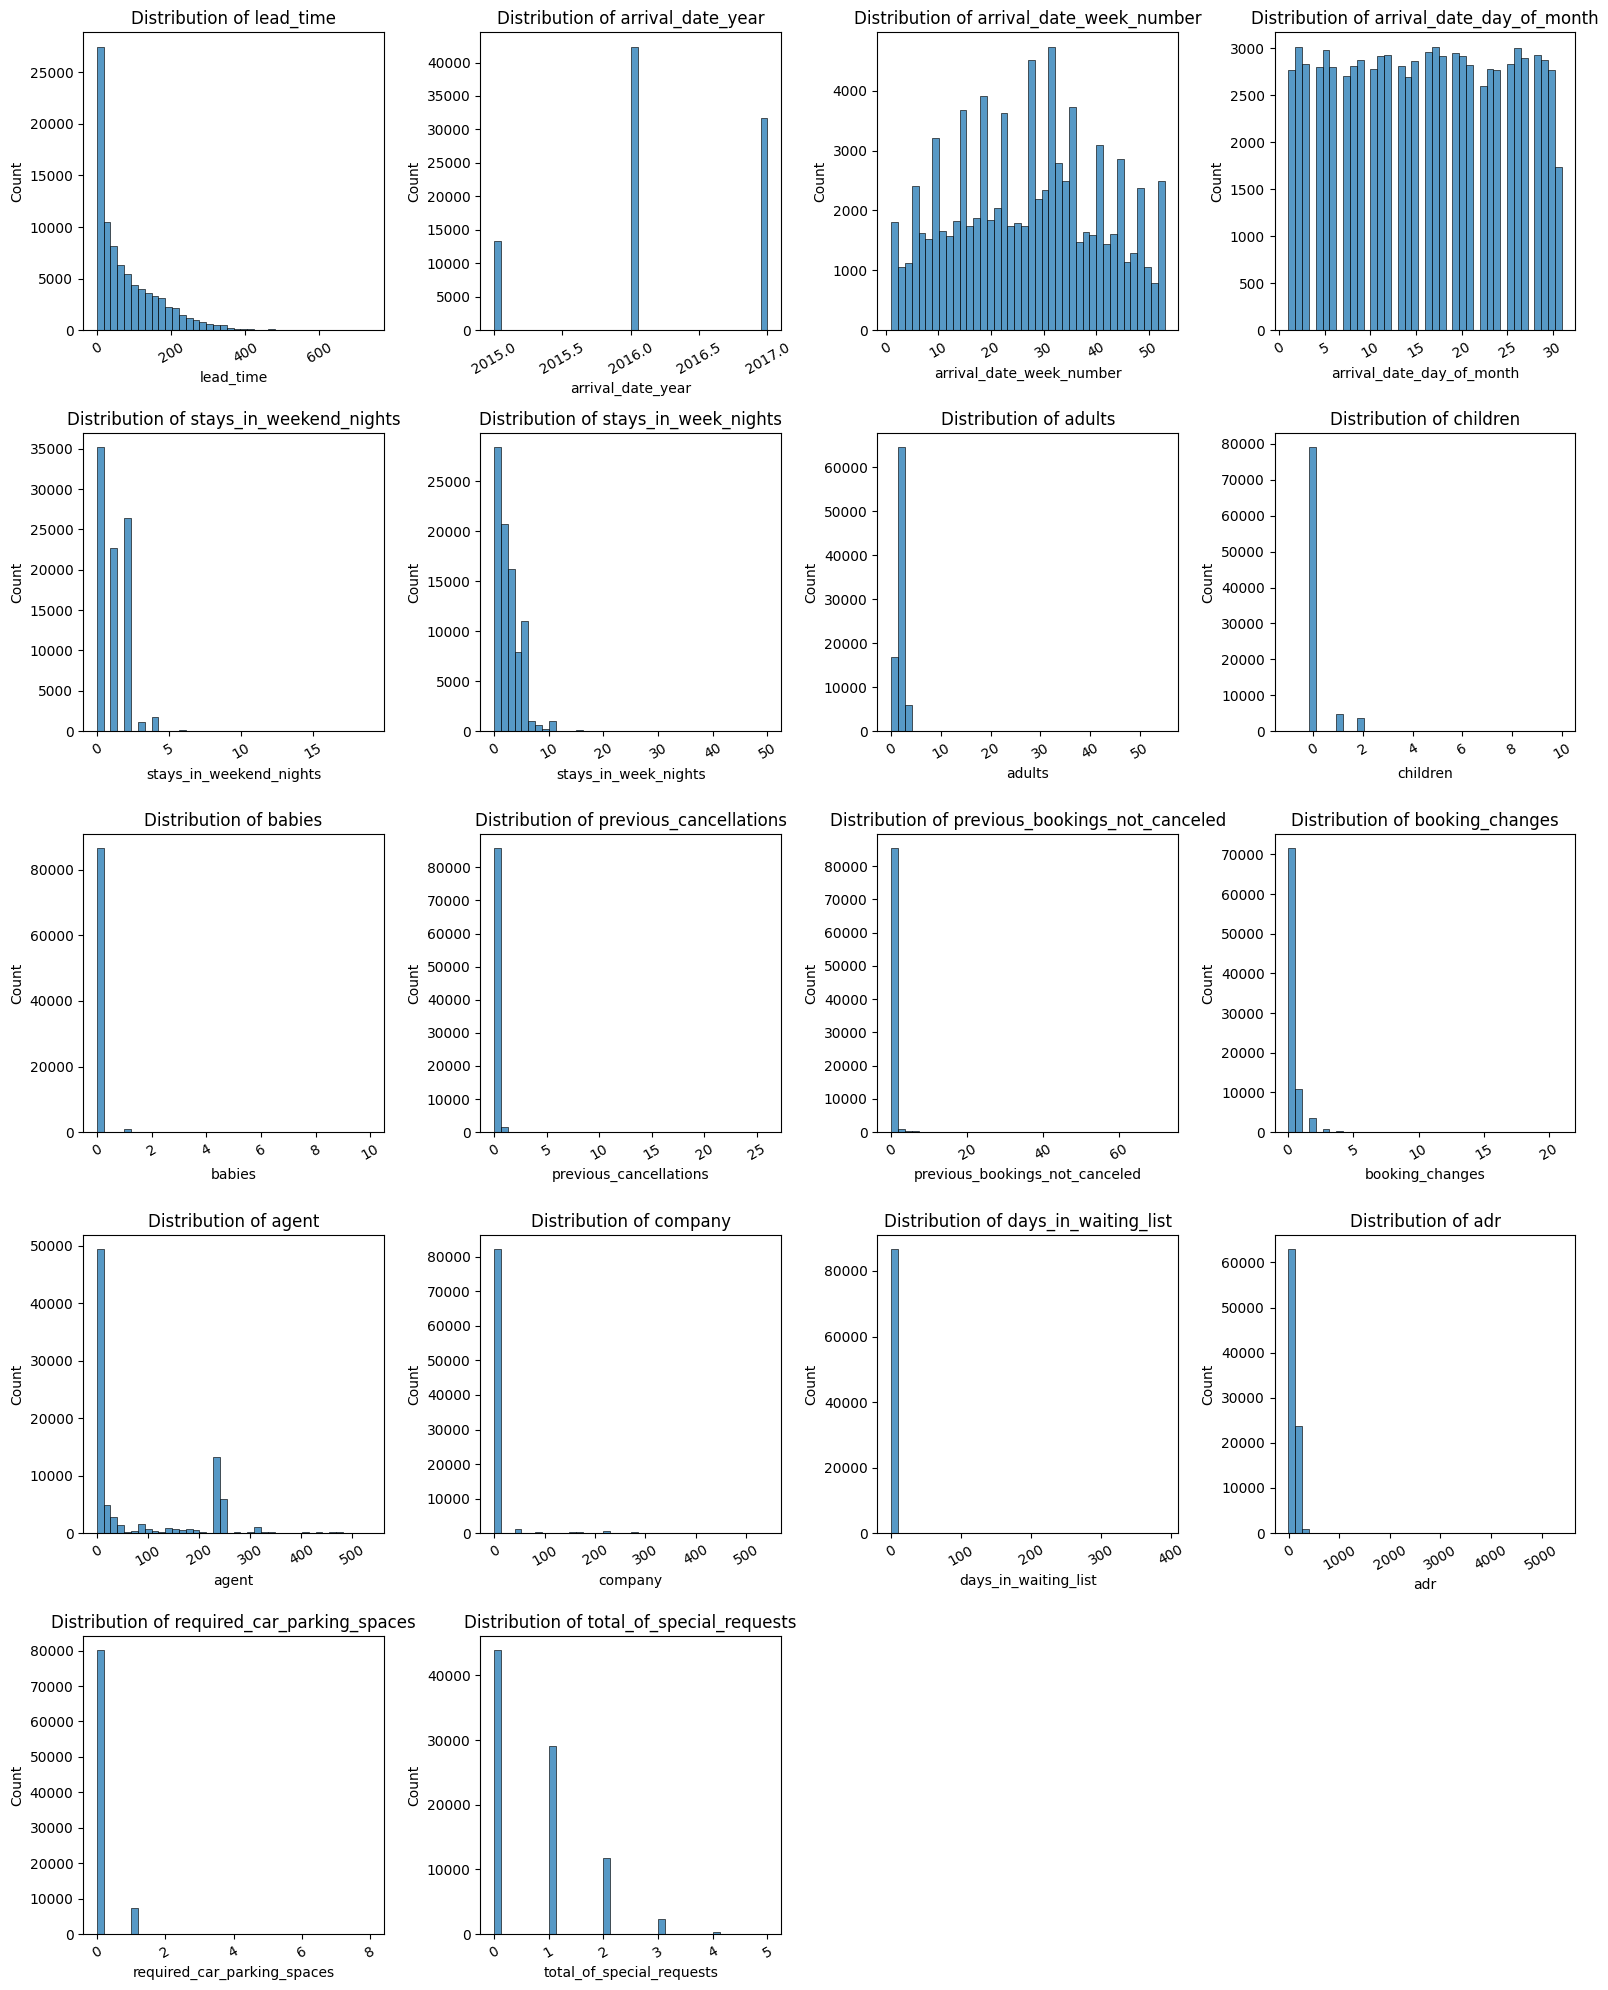

In [13]:
num_num_cols = len(num_list)
num_rows = num_num_cols // 4 + (1 if num_num_cols % 4 != 0 else 0)

plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(num_list, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[col], bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### Dữ liệu Categorical
 

#### Thống kê mô tả các cột categorical

In [14]:
df[cate_list].describe()

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,2,12,5,178,8,5,2,10,12,3,4,3,926
top,City Hotel,0,August,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out,2/14/2016
freq,53428,63371,11257,67978,27453,51618,69141,83981,56552,46313,86251,71986,63371,211


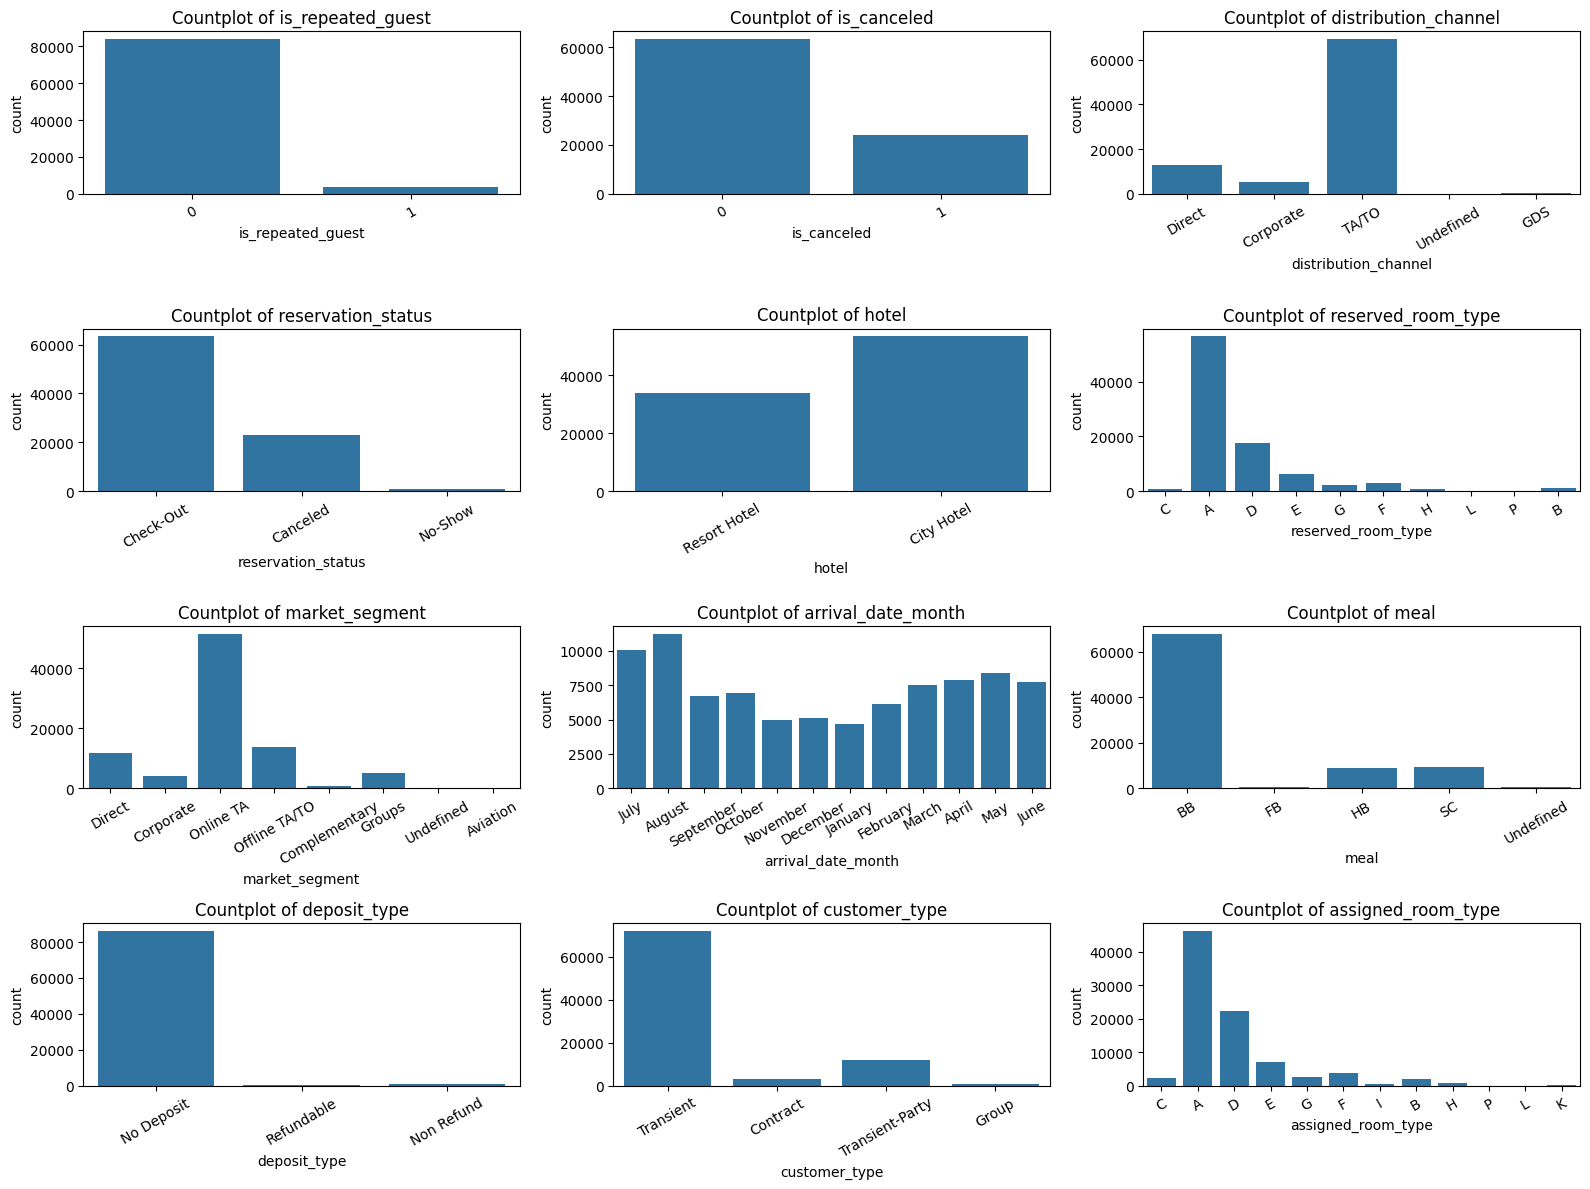

In [15]:

cate_cols_plot = list(set(cate_list) - set(['country', 'reservation_status_date']))
num_cate_cols = len(cate_cols_plot)
num_rows = num_cate_cols // 3 + (1 if num_cate_cols % 3 != 0 else 0)

plt.figure(figsize=(16, 3 * num_rows))
for i, col in enumerate(cate_cols_plot, 1):
        plt.subplot(num_rows, 3, i)
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# II. EDA 2D 

## 1. Phân tích hệ số tương quan giữa các biến numeric

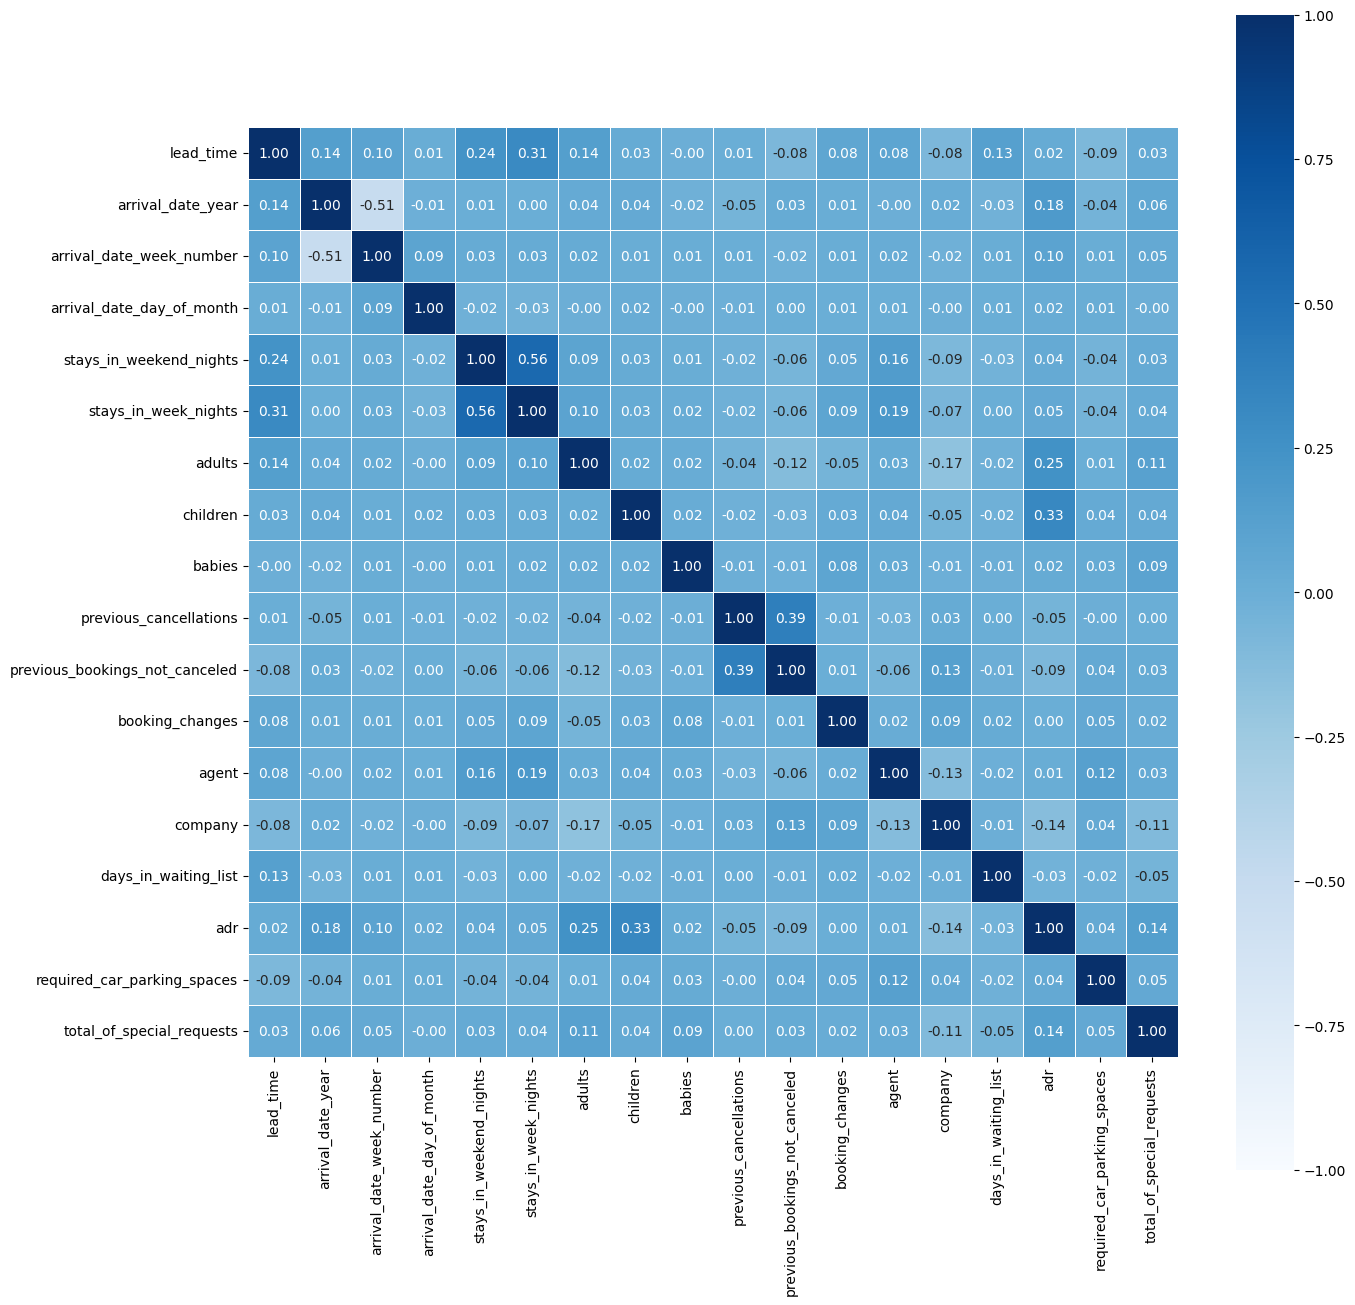

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df[num_list].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap="Blues", vmin=-1, vmax=1)
plt.show()

## 2. Sử dụng Scatter plot để phân tích dữ liệu 2D

Ta sẽ dùng scatter plot để phân tích sự tương quan giữa 2 biến numeric có độ lớn hệ số tương quan >= 0.35 từ biểu đồ heatmap ở trên:

- `arrival_date_year` và `arrival_date_week_number`

- `stay_in_week_nights` và `stay_in_weekend_nights`

- `previous_bookings_not_canceled` và `previous_cancellations`

**`arrival_date_year` và `arrival_date_week_number`**

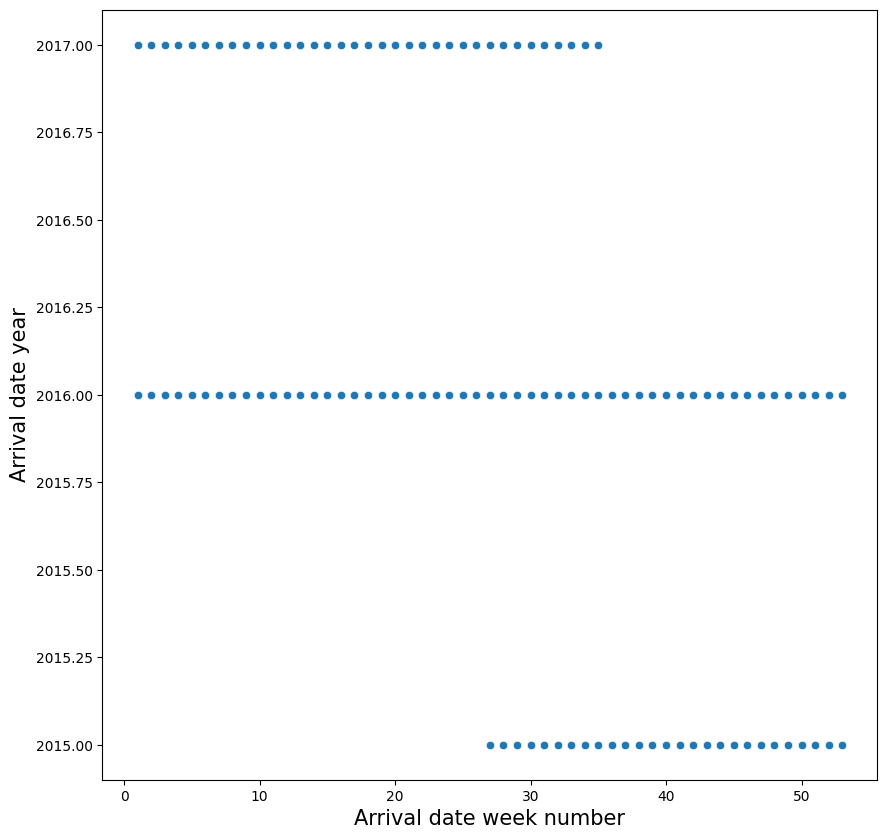

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="arrival_date_week_number", y="arrival_date_year")
plt.xlabel('Arrival date week number', size= 15)
plt.ylabel('Arrival date year', size= 15)
plt.show()

**`stays_in_week_nights` và `stays_in_weekend_nights`**

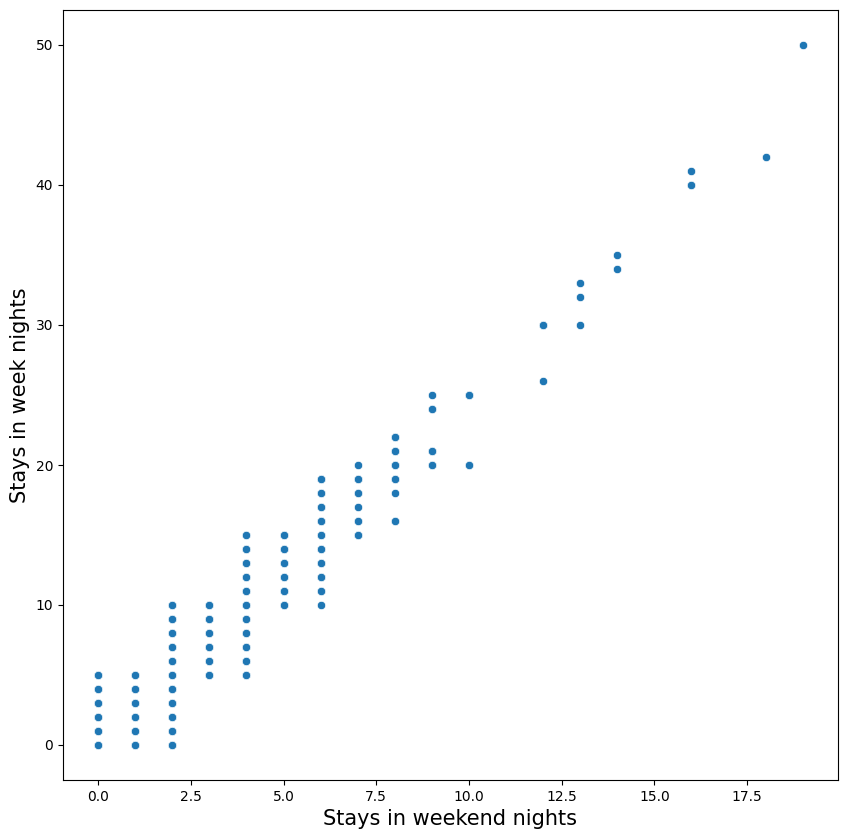

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="stays_in_weekend_nights", y="stays_in_week_nights")
plt.xlabel('Stays in weekend nights', size= 15)
plt.ylabel('Stays in week nights', size= 15)
plt.show()

**`previous_bookings_not_canceled` và `previous_cancellations`**

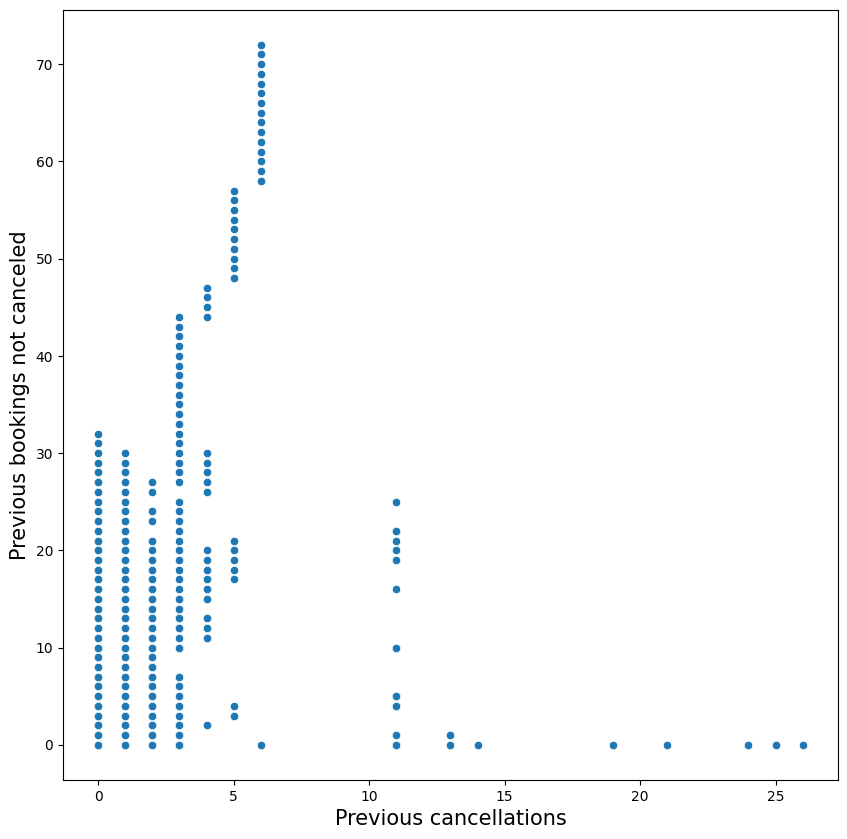

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

## 3. Sử dùng bar chart để phân tích dữ liệu numeric và categorical

In [22]:
df.groupby([cate_list[0]]).agg({num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_week_number                         
                                  min       mean       std max
hotel                                                         
City Hotel                          1  26.637606  13.58628  53
Resort Hotel                        1  27.154057  13.80660  53

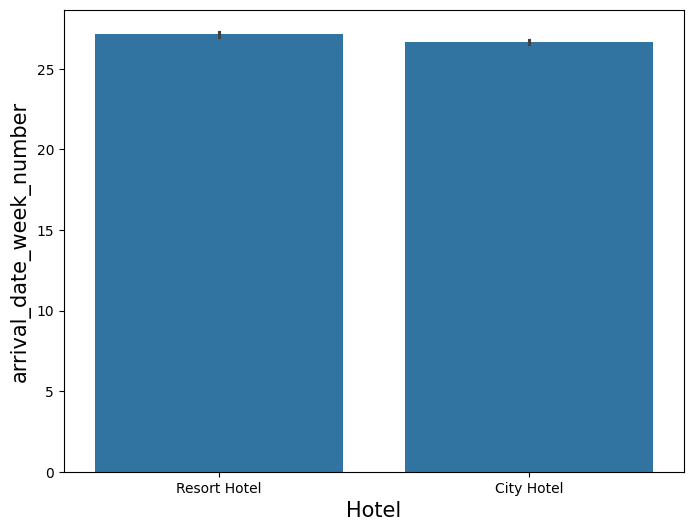

In [23]:
# bar chart of adr and hotel
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x='hotel', y='arrival_date_week_number', data=df)
plt.xlabel('Hotel', size= 15)
plt.ylabel('arrival_date_week_number', size= 15)
plt.show()


In [24]:
cate_list

['hotel',
 'is_canceled',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [25]:
num_list

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

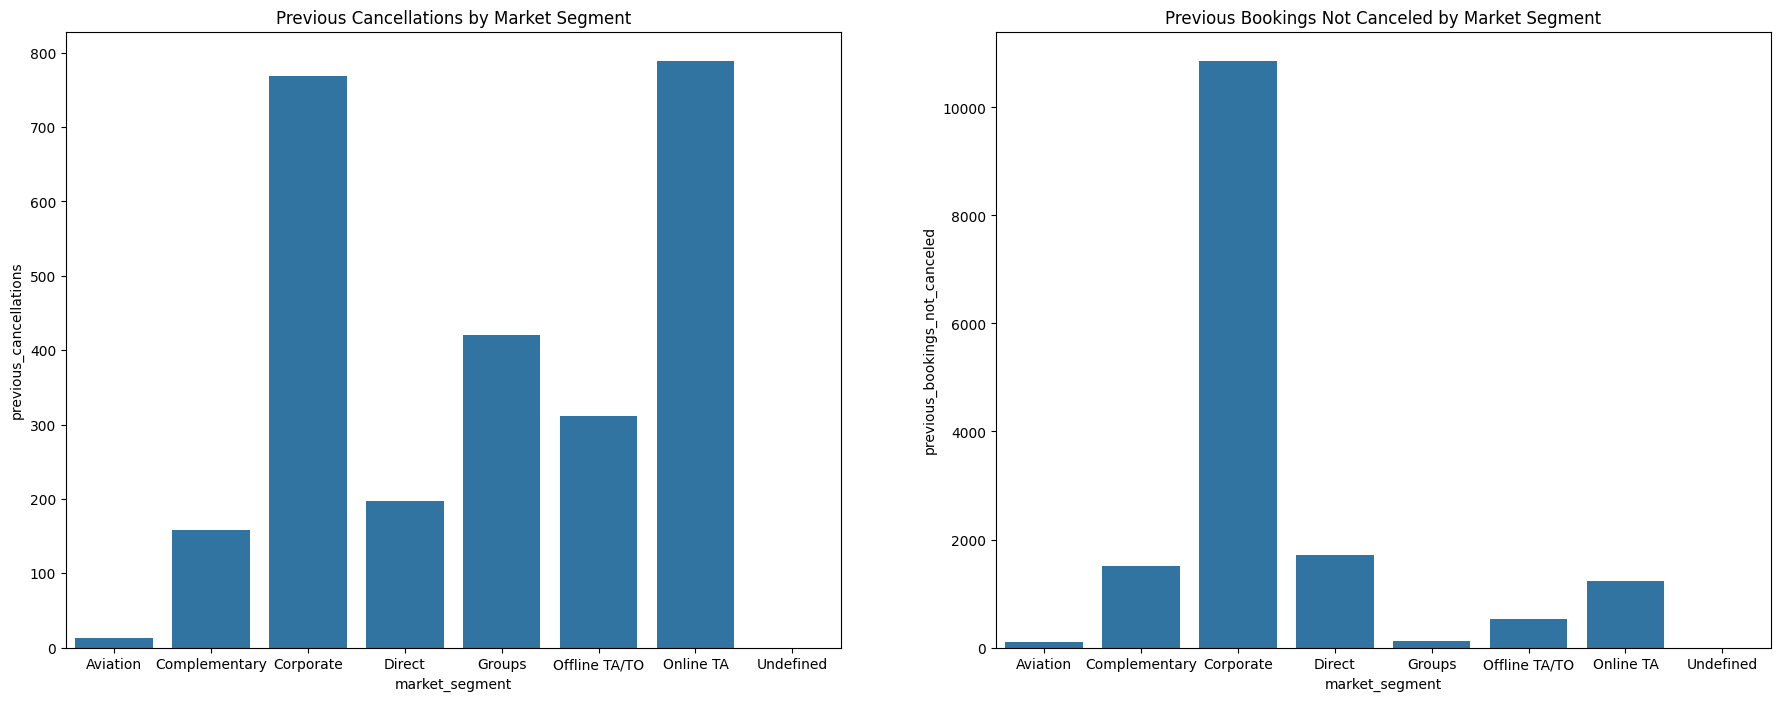

In [26]:
market_previous_cancellation = df.groupby('market_segment').agg({'previous_cancellations': 'sum'}).reset_index()
market_not_cancellation = df.groupby('market_segment').agg({'previous_bookings_not_canceled': 'sum'}).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
sns.barplot(x='market_segment', y='previous_cancellations', data=market_previous_cancellation, ax=ax[0])
sns.barplot(x='market_segment', y='previous_bookings_not_canceled', data=market_not_cancellation, ax=ax[1])
ax[0].set_title('Previous Cancellations by Market Segment')
ax[1].set_title('Previous Bookings Not Canceled by Market Segment')

plt.show()

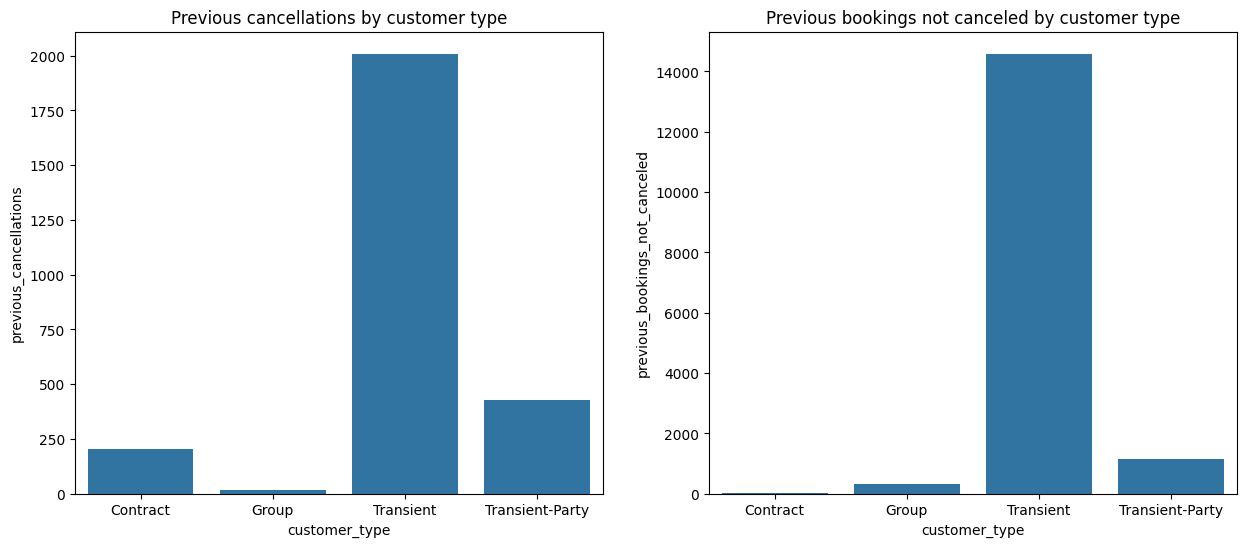

In [27]:
customer_previos_cancellations = df.groupby('customer_type').agg({'previous_cancellations': 'sum'}).reset_index()
customer_not_cancellations = df.groupby('customer_type').agg({'previous_bookings_not_canceled': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
sns.barplot(x='customer_type', y='previous_cancellations', data=customer_previos_cancellations, ax=ax[0])
sns.barplot(x='customer_type', y='previous_bookings_not_canceled', data=customer_not_cancellations, ax=ax[1])
ax[0].set_title('Previous cancellations by customer type')
ax[1].set_title('Previous bookings not canceled by customer type')
plt.show()

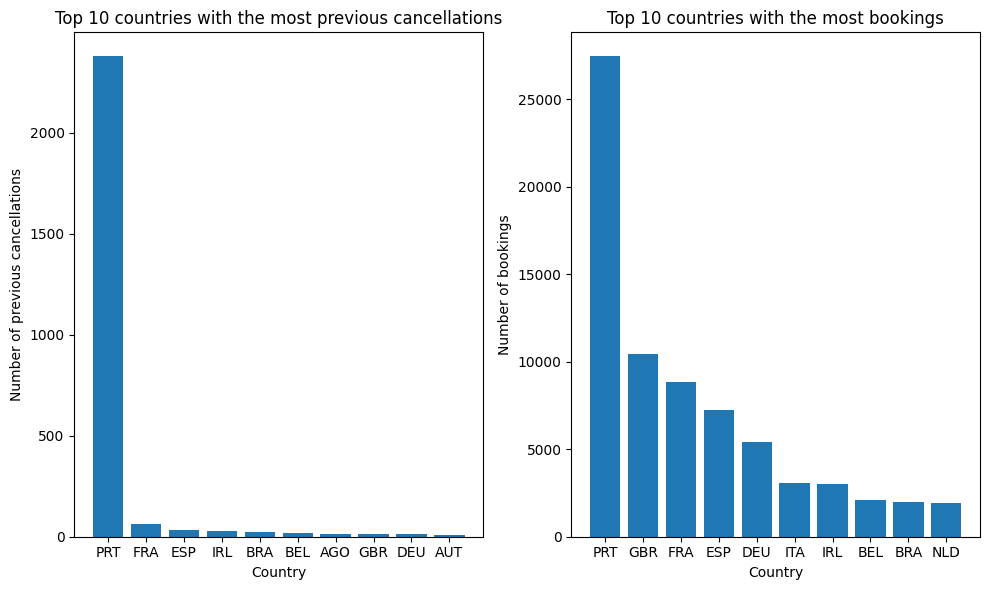

In [28]:
top_10_countries = df[df['country'] != -1].groupby('country').agg({'previous_cancellations': 'sum'}).nlargest(10, 'previous_cancellations')

# Reset index to make 'country' a column instead of index
top_10_countries = top_10_countries.reset_index()
fig, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
ax[0].bar(top_10_countries['country'], top_10_countries['previous_cancellations'])
ax[0].set_title('Top 10 countries with the most previous cancellations')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Number of previous cancellations')

top_10_countries = df[df['country'] != -1].groupby('country').count().nlargest(10, 'hotel')
top_10_countries = top_10_countries.reset_index()
ax[1].bar(top_10_countries['country'], top_10_countries['hotel'])
ax[1].set_title('Top 10 countries with the most bookings')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Number of bookings')

plt.tight_layout()
plt.show()


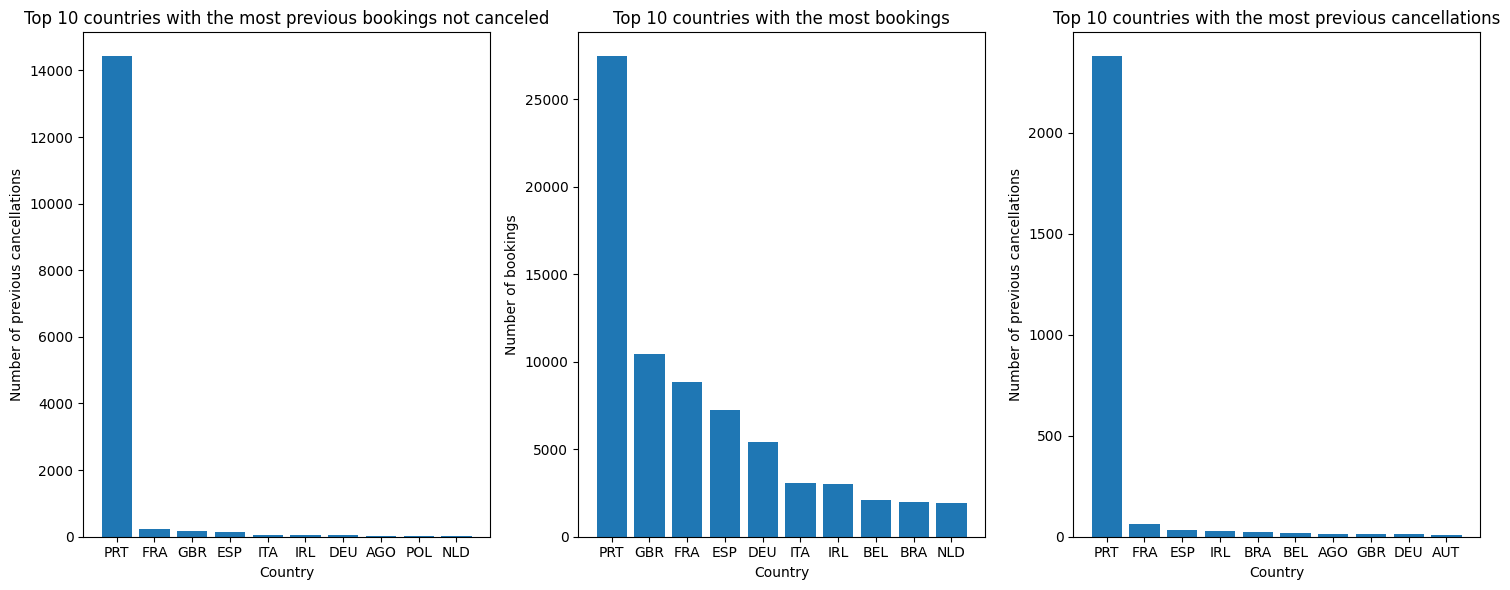

In [29]:
top_10_countries = df[df['country'] != -1].groupby('country').agg({'previous_bookings_not_canceled': 'sum'}).nlargest(10, 'previous_bookings_not_canceled')

# Reset index to make 'country' a column instead of index
top_10_countries = top_10_countries.reset_index()
fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=3)
ax[0].bar(top_10_countries['country'], top_10_countries['previous_bookings_not_canceled'])
ax[0].set_title('Top 10 countries with the most previous bookings not canceled')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Number of previous cancellations')

top_10_countries = df[df['country'] != -1].groupby('country').count().nlargest(10, 'hotel')
top_10_countries = top_10_countries.reset_index()
ax[1].bar(top_10_countries['country'], top_10_countries['hotel'])
ax[1].set_title('Top 10 countries with the most bookings')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Number of bookings')

top_10_countries = df[df['country'] != -1].groupby('country').agg({'previous_cancellations': 'sum'}).nlargest(10, 'previous_cancellations')
top_10_countries = top_10_countries.reset_index()
ax[2].bar(top_10_countries['country'], top_10_countries['previous_cancellations'])
ax[2].set_title('Top 10 countries with the most previous cancellations')
ax[2].set_xlabel('Country')
ax[2].set_ylabel('Number of previous cancellations')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Arrivals per year in Both hotels ')

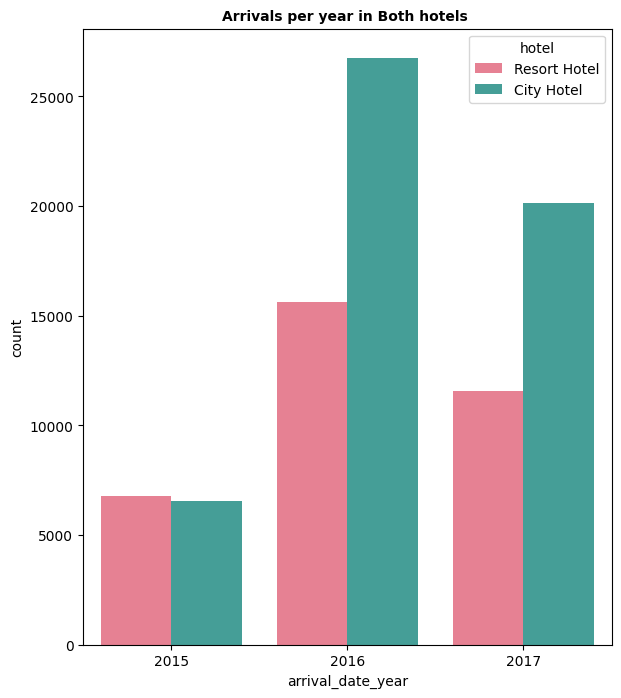

In [30]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=10)

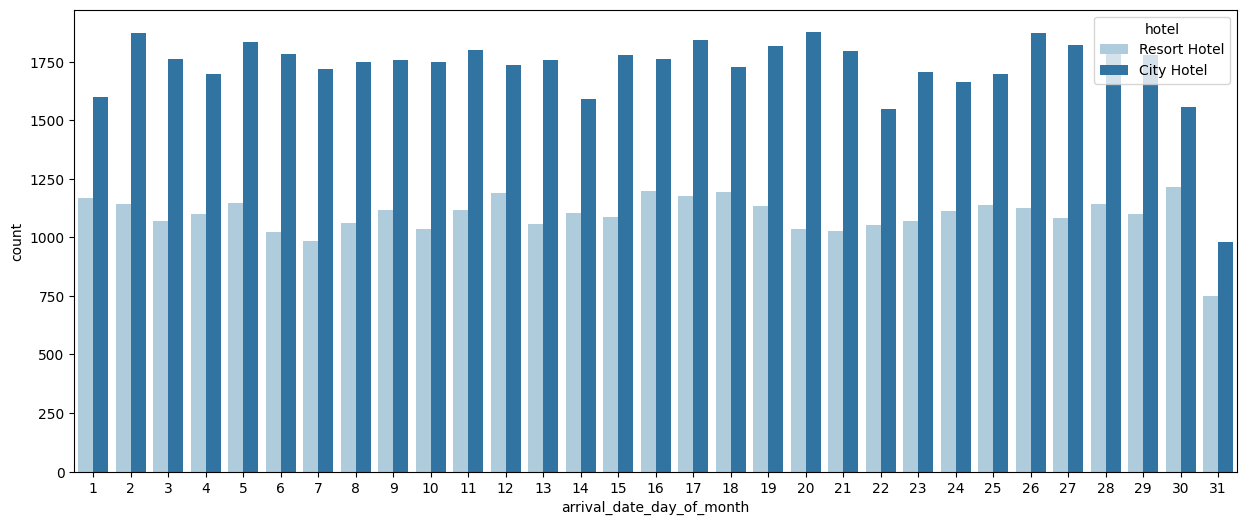

In [31]:
plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

Text(0, 0.5, 'Count')

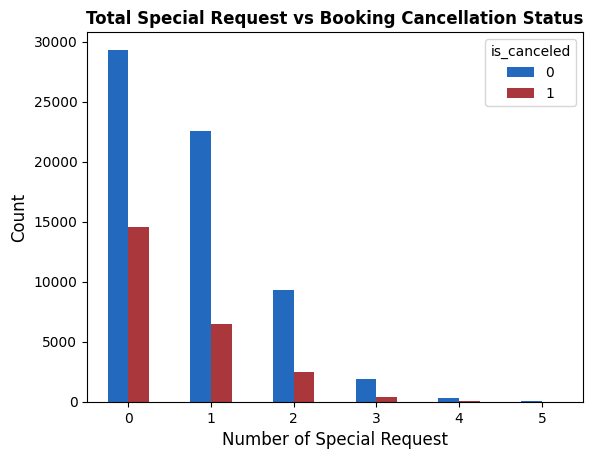

In [32]:
# convert to double bar chart
group_adr_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', cmap='vlag')
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

## 4. Tính tỉ trọng đối với hai biến categorical

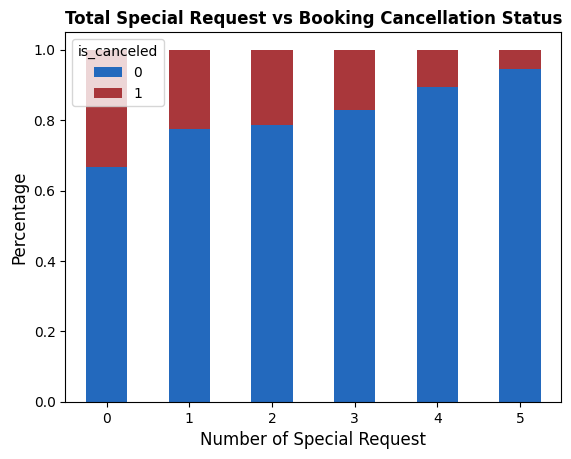

In [33]:
# Tính tỷ trọng đối với hai biến cate.
group_adr_request = group_adr_request.div(group_adr_request.sum(axis=1), axis=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag')
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Percentage', fontsize=12)
plt.show()


#### Tỷ trọng giữa 2 biến `hotel` và `arrival_date_month`

In [42]:
result = df.groupby([cate_list[0], cate_list[2]]).agg({cate_list[2]: 'count'})/len(df)*100
result = result.round(2)
result

arrival_date_month
hotel        arrival_date_month                    
City Hotel   April                             5.81
             August                            7.54
             December                          3.45
             February                          4.12
             January                           3.12
             July                              6.57
             June                              5.73
             March                             5.56
             May                               6.19
             November                          3.37
             October                           4.81
             September                         4.85
Resort Hotel April                             3.24
             August                            5.34
             December                          2.42
             February                          2.85
             January                           2.25
             July                              4.94
             June                              3.16
             March                             3.04
             May                               3.37
             November                          2.35
             October                           3.12
             September                         2.80

#### Tỷ trọng giữa 2 biến `hotel` và `reservation_status`

In [41]:
result = df.groupby([cate_list[0], cate_list[12]]).agg({cate_list[12]: 'count'})/len(df)*100
result = result.round(2)
result

reservation_status
hotel        reservation_status                    
City Hotel   Canceled                         17.51
             Check-Out                        42.77
             No-Show                           0.86
Resort Hotel Canceled                          8.82
             Check-Out                        29.74
             No-Show                           0.30

#### Tỷ trọng giữa 2 biến `deposit_type` và `reservation_status`

In [45]:
result = df.groupby([cate_list[10], cate_list[12]]).agg({cate_list[12]: 'count'})/len(df)*100
result = result.round(2)
result

reservation_status
deposit_type reservation_status                    
No Deposit   Canceled                         25.18
             Check-Out                        72.35
             No-Show                           1.15
Non Refund   Canceled                          1.12
             Check-Out                         0.06
             No-Show                           0.01
Refundable   Canceled                          0.03
             Check-Out                         0.09
             No-Show                           0.00

#### Tỷ trọng giữa 2 biến `hotel` và `deposit_type`

In [46]:
result = df.groupby([cate_list[0], cate_list[10]]).agg({cate_list[10]: 'count'})/len(df)*100
result = result.round(2)
result

deposit_type
hotel        deposit_type              
City Hotel   No Deposit           60.15
             Non Refund            0.97
             Refundable            0.02
Resort Hotel No Deposit           38.54
             Non Refund            0.22
             Refundable            0.11

#### Tỷ trọng giữa 2 biến `is_canceled` và `arrival_date_month`

In [48]:
result = df.groupby([cate_list[1], cate_list[2]]).agg({cate_list[2]: 'count'})/len(df)*100
result = result.round(2)
result

arrival_date_month
is_canceled arrival_date_month                    
0           April                             6.29
            August                            8.73
            December                          4.29
            February                          5.36
            January                           4.18
            July                              7.85
            June                              6.19
            March                             6.50
            May                               6.77
            November                          4.51
            October                           6.06
            September                         5.78
1           April                             2.76
            August                            4.15
            December                          1.58
            February                          1.62
            January                           1.19
            July                              3.66
            June                              2.69
            March                             2.09
            May                               2.79
            November                          1.21
            October                           1.88
            September                         1.88

# EDA 3D 

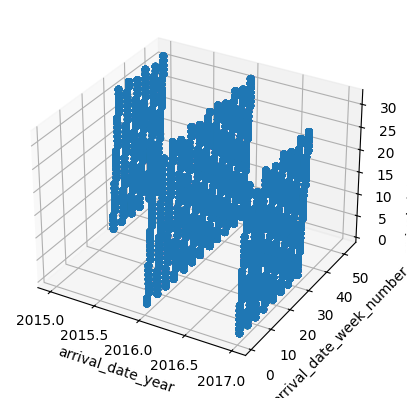

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df[num_list[1]], df[num_list[2]], df[num_list[3]])
ax.set_xlabel(num_list[1])
ax.set_ylabel(num_list[2])
ax.set_zlabel(num_list[3])
plt.show()

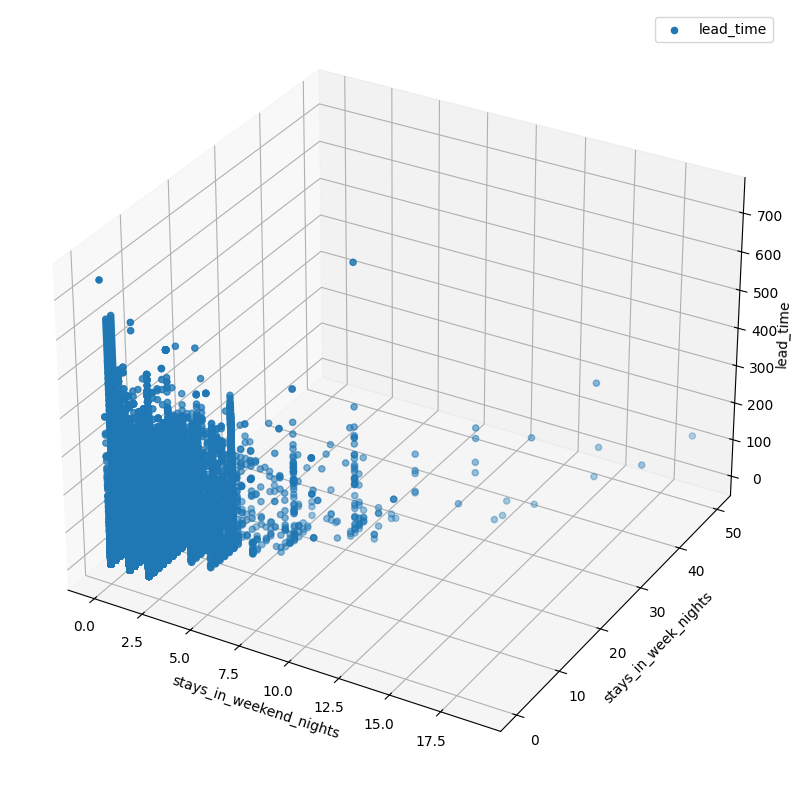

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
# add legend
ax.scatter(df['stays_in_weekend_nights'], df['stays_in_week_nights'], df['lead_time'], label='lead_time')
ax.set_xlabel('stays_in_weekend_nights')
ax.set_ylabel('stays_in_week_nights')
ax.set_zlabel('lead_time')
ax.zaxis.labelpad=-0.9
plt.legend()
plt.show()


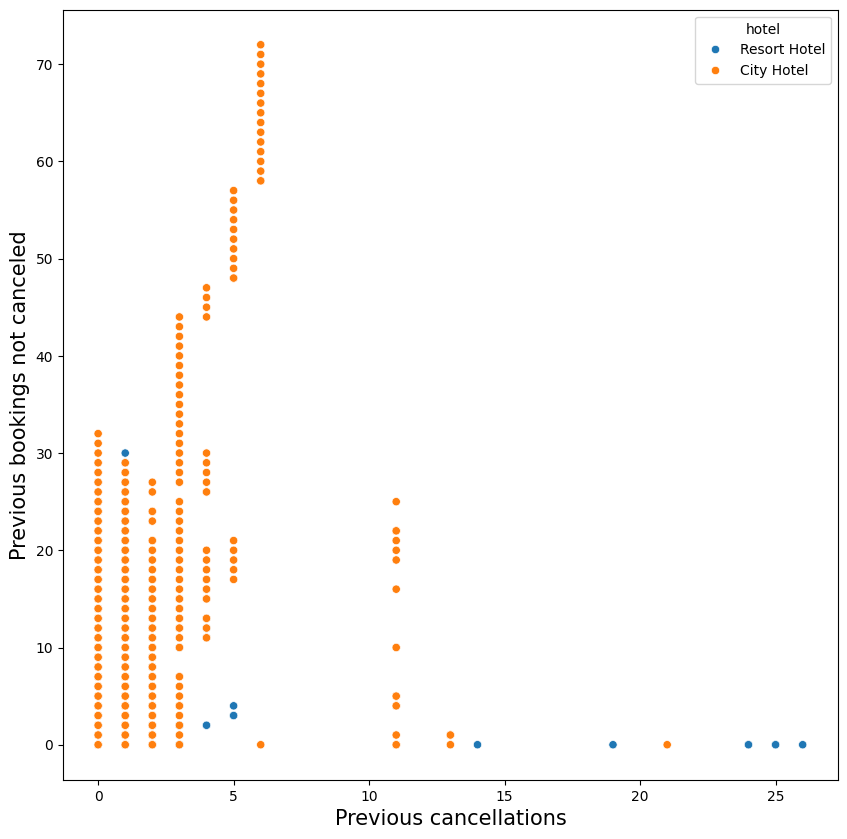

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled", hue=cate_list[0])
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

In [39]:
df.groupby(cate_list[0]).agg({num_list[1]: ['min', 'mean', 'std', 'max'], num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_year                               \
                           min         mean       std   max   
hotel                                                         
City Hotel                2015  2016.253968  0.659292  2017   
Resort Hotel              2015  2016.141604  0.720948  2017   

             arrival_date_week_number                           
                                  min       mean       std max  
hotel                                                           
City Hotel                          1  26.637606  13.58628  53  
Resort Hotel                        1  27.154057  13.80660  53

# Insight 

* previous cancellations tương quan thuận với previous bookings not canceled
* Trung bình previous cancellations của City Hotel cao hơn trung bình previous cancellations của Resort Hotel  

### 1. Data Understanding
- Tập dữ liệu gồm 119390 dòng và 32 cột

- Trong đó có 2 cột thiếu dữ liệu nhiều nhất với cột `company` hơn 94`%` dòng dữ liệu bị thiếu và cột `agent` là hơn 13`%`

- Số trường dữ liệu bị thiếu ở mỗi dòng: Trong đó thiếu 1 trường là nhiều nhất với 91`%` và 2 trường là 8`%`

- Tỷ lệ dòng dữ liệu bị trùng lặp là 26.8`%`. 

- Nhóm đã điền tất cả các giá trị thiếu trong bộ dữ liệu bằng giá trị `-1` để có thể dùng đến các cột có giá trị thiếu trong quá trình phân tích dữ liệu

- Sau khi điền giá trị thiếu, xóa những dòng dữ liệu trùng lặp, bộ dữ liệu còn lại gồm 87396 dòng và 32 cột


### 2. EDA 1D
- Dựa vào biểu đồ phân phối của trường `lead_time` ta thấy phần lớn người đặt phòng sẽ nhận phòng sớm trong vòng 10 ngày, trong đó hơn `6000` số lượng đặt phòng sẽ nhận phòng ngay lập tức.

- Ta cũng biết được năm 2016 là năm có số lượng đặt phòng lớn nhất.

- 

- Số lượng đặt phòng ở City Hotel gấp 1.5 lần số lượng đặt Resort Hotel. Gần như toàn bộ khách hàng đều là khách mới, có một số lượng nhỏ là khách cũ và 82`%` khách hàng là dạng `Transient` (Tạm thời)
- Trong tổng số lượng đặt phòng thì có <sup>3</sup>&frasl;<sub>4</sub> phòng đã `check out` và <sup>1</sup>&frasl;<sub>3</sub> còn lại đã `canceled` và gần như toàn bộ số lượng đặt phòng đều là `no deposit` (Không đặt cọc)
- Từ biểu đồ số lượng đặt phòng ở các tháng ta thầy răng số lượng đặt phòng vào tháng 7 và 8 là nhiều nhất. Theo thống kê thì đây là 2 tháng mà số lượng người đi du lịch là nhiều nhất nên ta cũng suy ra số lượng đặt phòng 2 tháng này sẽ là nhiều.

### 3. EDA 2D
- **Dưới đây là những rút trích từ bảng tương quan các biến numerical**:
    - `stays_in_week_nights` và `stays_in_weekend_nights` có tương quan dương lớn (0.56). Điều này cho thấy khách hàng có xu hướng lưu trú cả trong tuần lẫn cuối tuần. Nói cách khác, những khách hàng chọn lưu trú nhiều đêm trong tuần thường cũng chọn lưu trú nhiều đêm vào cuối tuần. Điều này có thể phản ánh một xu hướng chung trong việc đặt phòng dài hạn hơn, không chỉ giới hạn ở việc lưu trú ngắn ngày.

    - `lead_time` và `stays_in_week_nights` có tương quan dương vừa phải (0.31), có thể cho thấy khách hàng thường đặt phòng trước càng lâu thì càng có xu hướng lưu trú nhiều đêm trong tuần hơn.

    - `adr` (Average Daily Rate) có một tương quan dương mạnh với `adults` (0.25) và `children` (0.33), nhưng lại có mức tương quan thấp với `babies` (0.04). Điều này cho thấy giá trung bình hàng ngày có liên quan đến số người lớn và trẻ em, nhưng không nhiều đối với số lượng em bé.

    - `arrival_date_year` và `lead_time` có tương quan dương yếu (0.14), có thể cho thấy rằng việc đặt phòng trước không có sự thay đổi đáng kể theo năm.

    - `agent` có tương quan nhỏ với hầu hết các biến khác, và một tương quan dương yếu với `booking_changes` (0.13), có thể là do việc đặt phòng qua đại lý có những điều chỉnh nhất định.

    - `required_car_parking_spaces` và `adr` có một tương quan lên tới (0.14), cho thấy có thể khách đặt phòng với giá cao hơn có xu hướng yêu cầu nhiều chỗ đậu xe hơn.

    - `total_of_special_requests` có một tương quan dương yếu với `booking_changes` (0.10), điều này có thể đến từ việc những khách hàng có nhiều yêu cầu đặc biệt hơn cũng thường xuyên thực hiện thay đổi đối với đặt phòng của họ.

- 